In [2]:
import pandas as pd
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [3]:
df = pd.read_csv('processed_layoffs_data.csv')
df.columns

Index(['Unnamed: 0', 'Company', 'Location_HQ', 'Industry', 'Laid_Off_Count',
       'Date', 'Source', 'Funds_Raised', 'Stage', 'Date_Added', 'Country',
       'Percentage', 'List_of_Employees_Laid_Off'],
      dtype='object')

In [4]:
df['Industry'].value_counts()

Industry
Finance           451
Retail            297
Healthcare        296
Transportation    226
Other             223
Food              213
Consumer          207
Marketing         178
Real Estate       151
Crypto            144
Education         142
Media             137
Security          121
Data              116
Travel             97
HR                 97
Infrastructure     66
Logistics          64
Sales              56
Support            54
Hardware           50
Recruiting         49
Product            48
Fitness            42
Energy             30
Construction       24
Manufacturing      18
Legal              18
Aerospace          16
AI                 10
Unknown             1
Name: count, dtype: int64

In [5]:
top_industry = df.head(10)
industry_counts = top_industry.value_counts()
ax = px.pie(data_frame=top_industry,names='Industry',values = 'Laid_Off_Count')
ax.show()

In [6]:
company_fund_raised = df.groupby('Company')['Funds_Raised']
top_com = company_fund_raised.sum().sort_values(ascending=False).reset_index().head(5)

fig = px.bar(
    top_com,
    x="Company",
    y="Funds_Raised",
    color='Company'
)
fig.show()

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df['month'] = df['Date'].dt.month_name()
df['day'] = df['Date'].dt.day

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



<Figure size 1000x600 with 0 Axes>

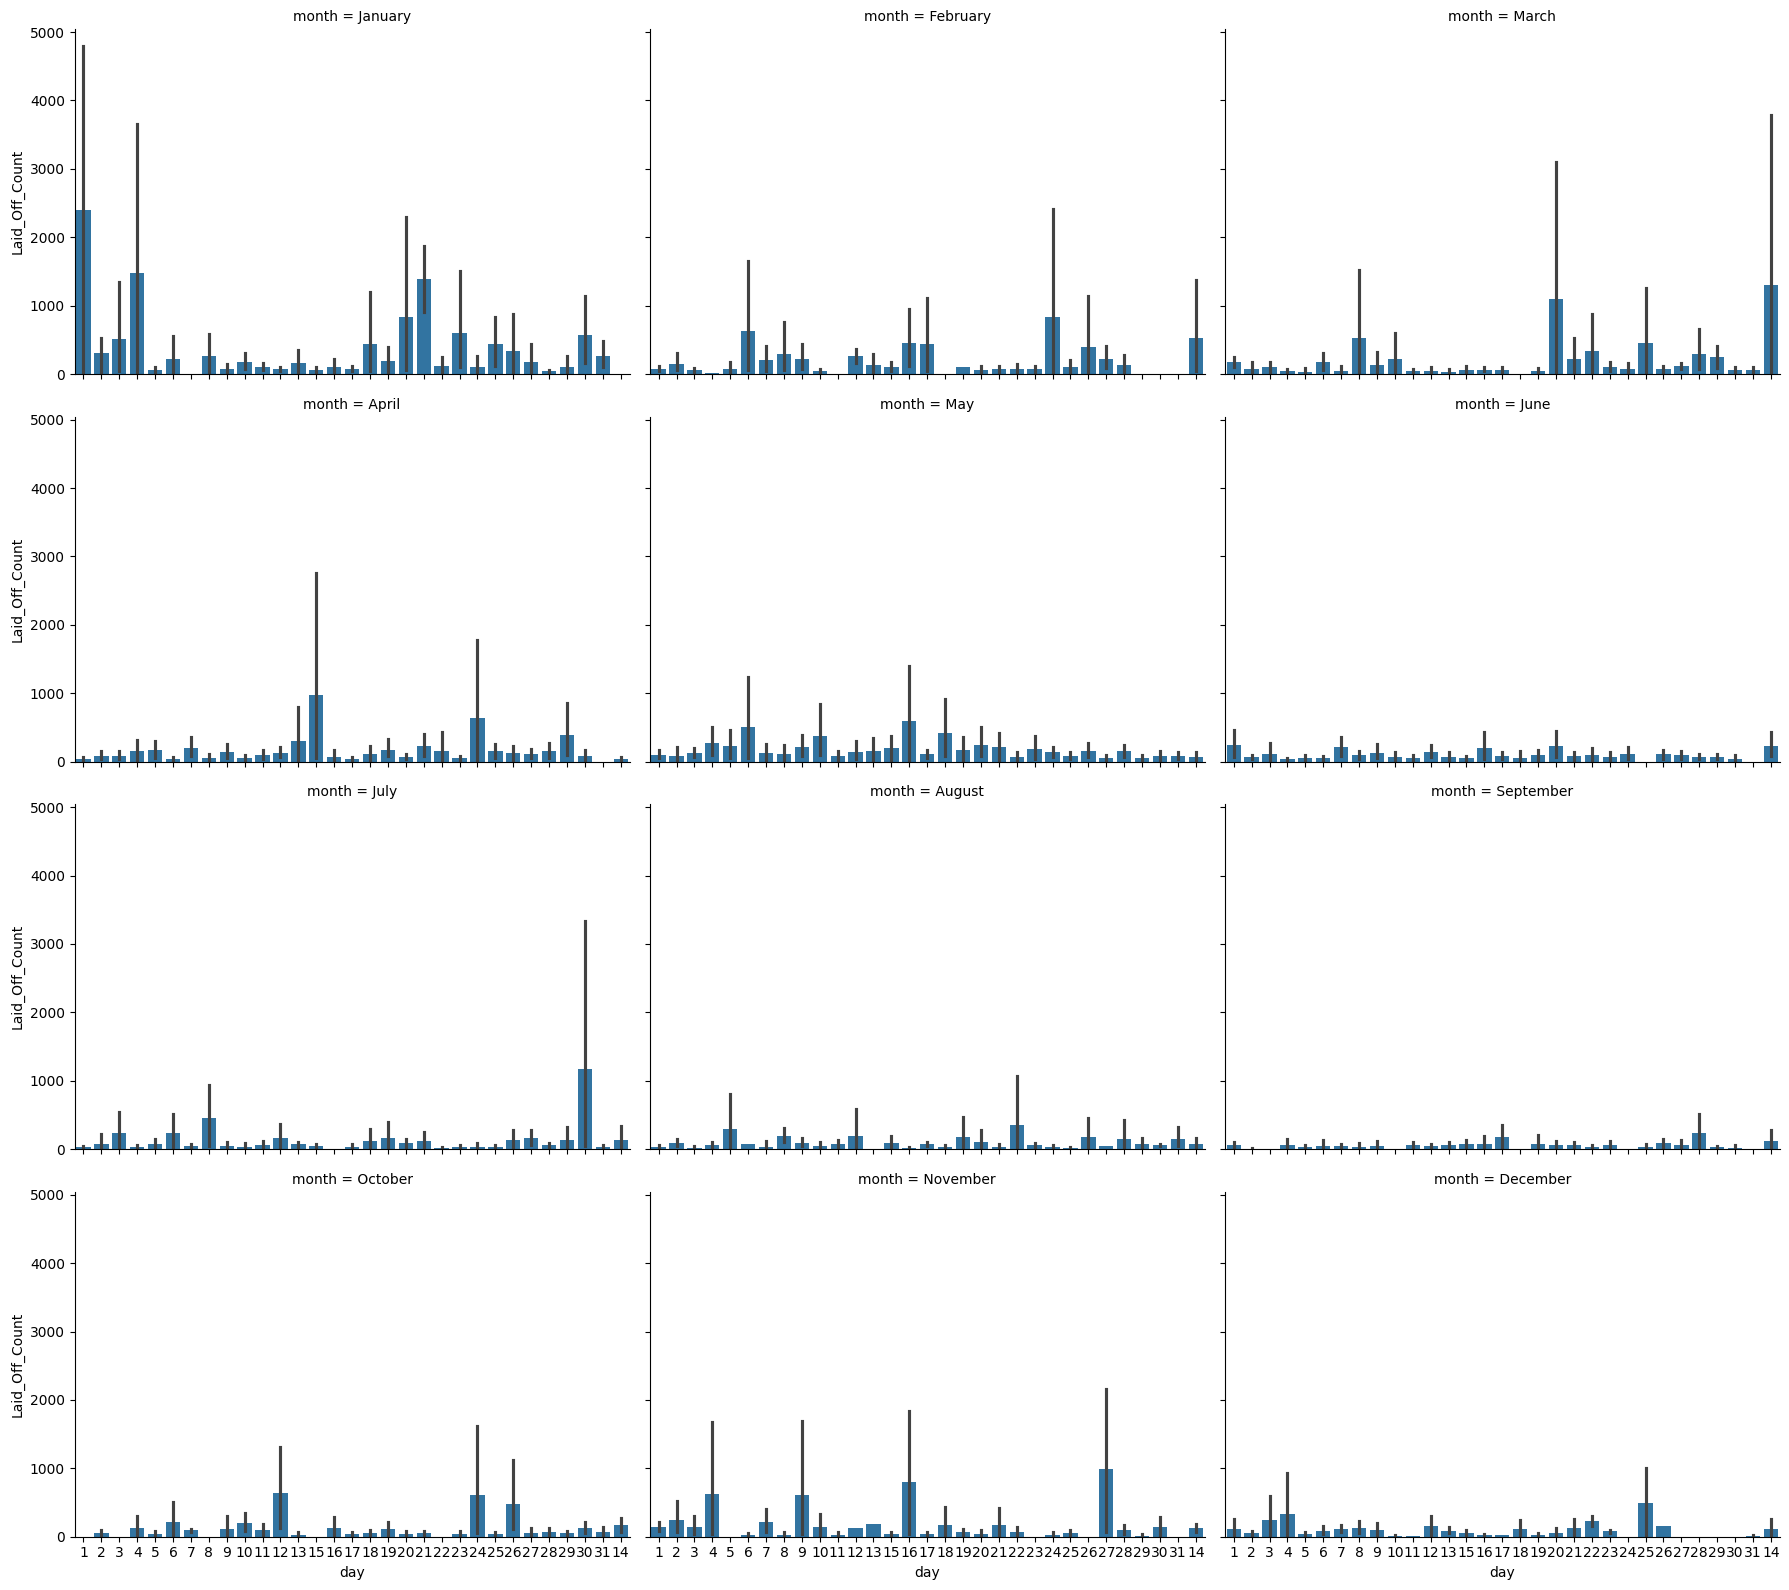

In [9]:
month_names = ['January','February','March','April','May','June','July','August','September','October','November','December']

plt.figure(figsize=(10,6))
ax = sns.FacetGrid(df,col="month",height=4,col_wrap=3,aspect=1.5,col_order=month_names)
ax.map(sns.barplot, 'day','Laid_Off_Count')
plt.show()

# **Subplots for Top 5 Industries, Companies and Countries**


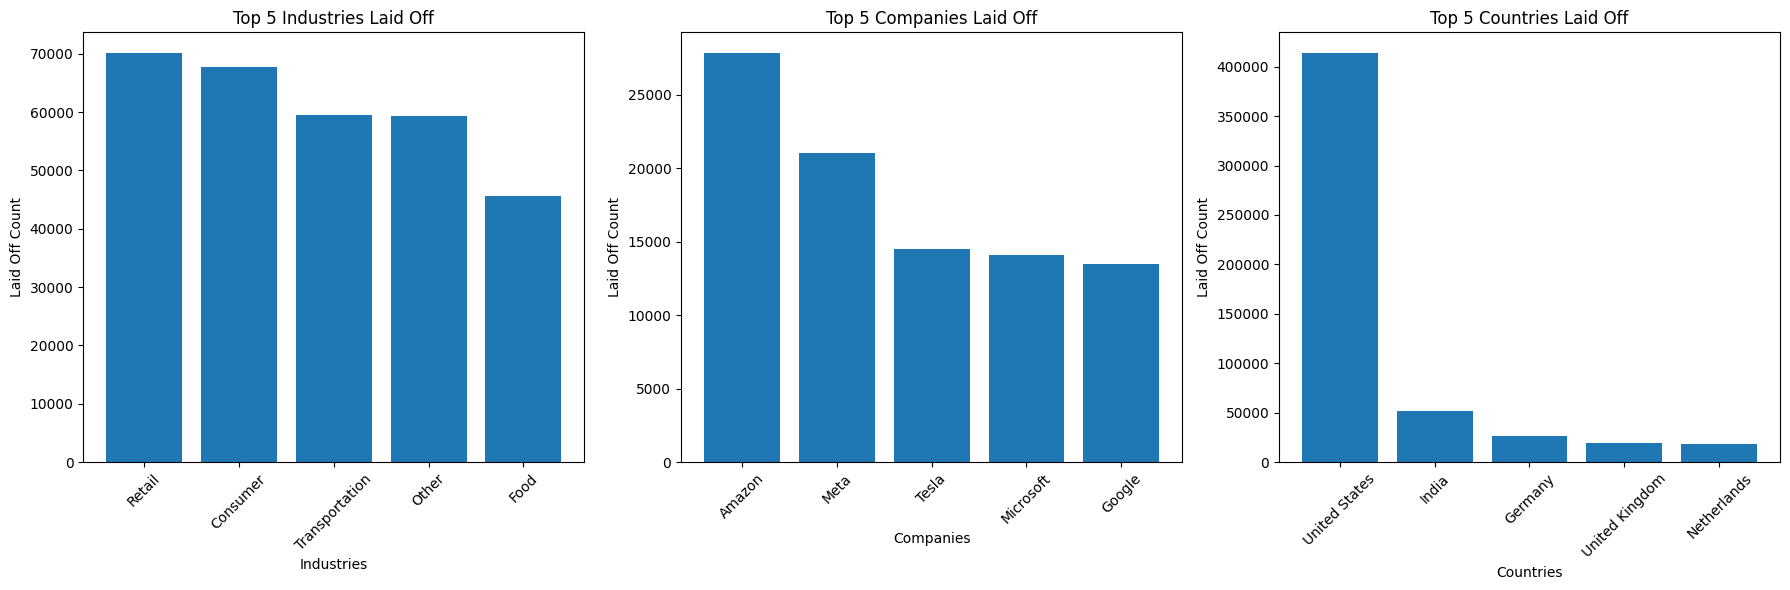

In [10]:

top_industries = df.groupby('Industry')['Laid_Off_Count'].sum().reset_index().sort_values(by='Laid_Off_Count', ascending=False).head()
top_companies = df.groupby('Company')['Laid_Off_Count'].sum().reset_index().sort_values(by='Laid_Off_Count', ascending=False).head()
top_countries = df.groupby('Country')['Laid_Off_Count'].sum().reset_index().sort_values(by='Laid_Off_Count', ascending=False).head()

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].bar(top_industries['Industry'], top_industries['Laid_Off_Count'])
axs[0].set_title('Top 5 Industries Laid Off')
axs[0].set_xlabel('Industries')
axs[0].set_ylabel('Laid Off Count')
axs[0].tick_params(axis='x', rotation=45)


axs[1].bar(top_companies['Company'], top_companies['Laid_Off_Count'])
axs[1].set_title('Top 5 Companies Laid Off')
axs[1].set_xlabel('Companies')
axs[1].set_ylabel('Laid Off Count')
axs[1].tick_params(axis='x', rotation=45)


axs[2].bar(top_countries['Country'], top_countries['Laid_Off_Count'])
axs[2].set_title('Top 5 Countries Laid Off')
axs[2].set_xlabel('Countries')
axs[2].set_ylabel('Laid Off Count')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# **HeatMap for the numeric Types**


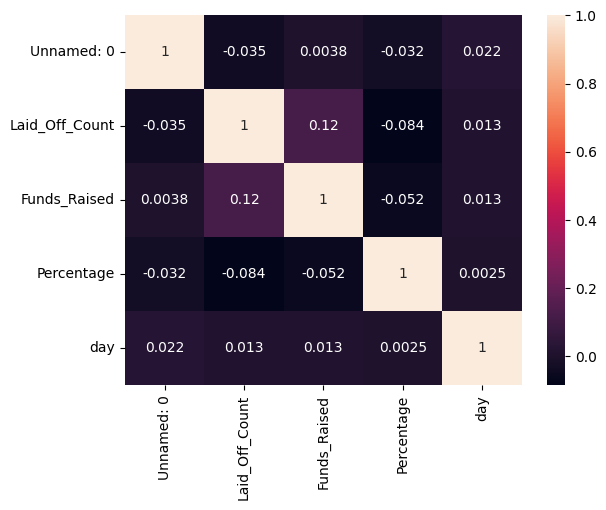

In [11]:
map = sns.heatmap(df.corr(numeric_only = True),annot=True)
plt.show()
